In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib as plt
import seaborn as sns

In [3]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN
...,...,...,...,...
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN


In [4]:
gdp_df.shape

(8219, 4)

There are 8219 rows and 4 columns in the gdp_percapita database

In [5]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

The data types are object, int64, and float64

In [6]:
gdp_df = gdp_df.drop(columns = 'Value Footnotes')
gdp_df

,Country or Area,Year,Value
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


In [7]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144


In [8]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


In [19]:
years = gdp_df.groupby('Country').count()
years

,Year,GDP_Per_Capita
Country,,
Afghanistan,24,24
Africa Eastern and Southern,34,34
Africa Western and Central,34,34
Albania,34,34
Algeria,34,34
...,...,...
Virgin Islands,21,21
West Bank and Gaza,30,30
World,34,34


In [10]:
years = years.reset_index()
years

,Country,Year,GDP_Per_Capita
0,Afghanistan,24,24
1,Africa Eastern and Southern,34,34
2,Africa Western and Central,34,34
3,Albania,34,34
4,Algeria,34,34
...,...,...,...
242,Virgin Islands,21,21
243,West Bank and Gaza,30,30
244,World,34,34
245,Zambia,34,34


In [13]:
years.loc[years.Year ==34]
##7a: 228 countries have data for all years

,Country,Year,GDP_Per_Capita
1,Africa Eastern and Southern,34,34
2,Africa Western and Central,34,34
3,Albania,34,34
4,Algeria,34,34
5,Andorra,34,34
...,...,...,...
240,Vanuatu,34,34
241,Viet Nam,34,34
244,World,34,34
245,Zambia,34,34


In [15]:
years.loc[years.Year<=17]
## 7b: 5 countries had less than half of all the years

,Country,Year,GDP_Per_Capita
54,Djibouti,11,11
73,Faroe Islands,16,16
115,Kosovo,16,16
195,Sint Maarten (Dutch part),15,15
229,Turks and Caicos Islands,13,13


In [16]:
countries = gdp_df.groupby('Year').count()
countries
## 7c: The number of total observations increases year over year until 2023

,Country,GDP_Per_Capita
Year,,
1990,233,233
1991,234,234
1992,234,234
1993,234,234
1994,235,235
1995,236,236
1996,236,236
1997,238,238
1998,238,238


In [20]:
gdp2020 = gdp_df.loc[gdp_df.Year == 2020]
gdp2020

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
27,Africa Eastern and Southern,2020,3861.111238
61,Africa Western and Central,2020,4622.731427
95,Albania,2020,14650.395929
129,Algeria,2020,14194.155748
...,...,...,...
8068,Virgin Islands,2020,45055.782930
8090,West Bank and Gaza,2020,5423.682547
8120,World,2020,18600.986362
8154,Zambia,2020,3391.595412


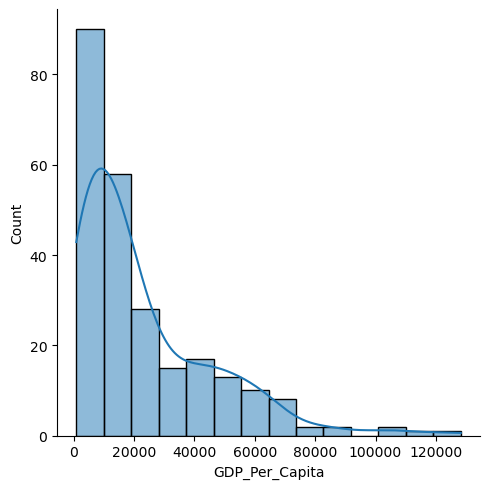

In [24]:
##histogram
sns.displot(data = gdp2020["GDP_Per_Capita"], kde=True)

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

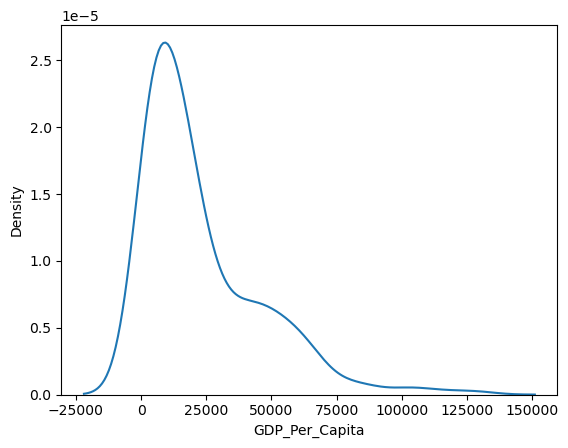

In [25]:
##density plot
sns.kdeplot(gdp2020['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

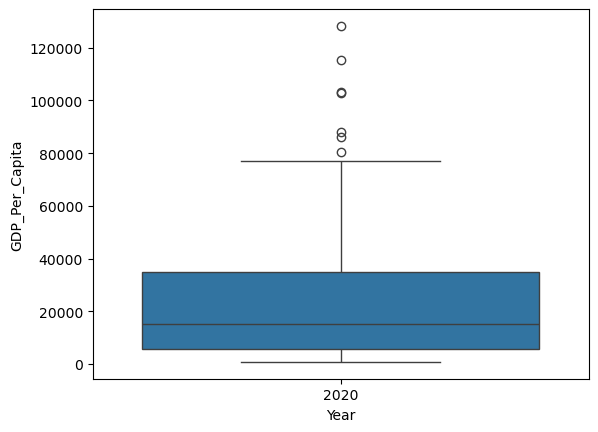

In [30]:
##boxplot
sns.boxplot(x=gdp2020["Year"], y=gdp2020["GDP_Per_Capita"])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

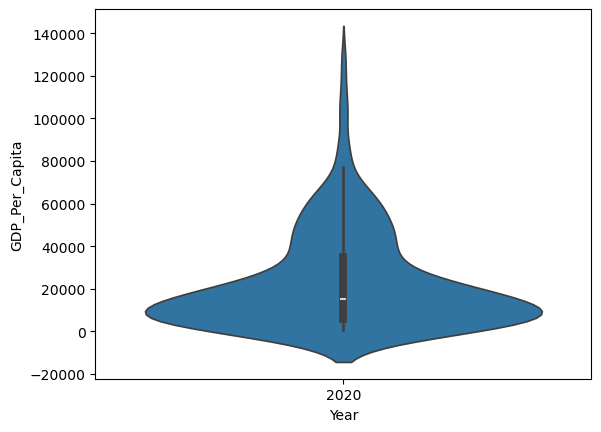

In [29]:
##violin chart
sns.violinplot(x=gdp2020['Year'], y=gdp2020['GDP_Per_Capita'])

In [33]:
gdp2020.describe()
##Question 9: median in 2020 is 15309.235988

,Year,GDP_Per_Capita
count,247.0,247.000000
mean,2020.0,23044.942556
std,0.0,22856.889868
min,2020.0,833.920257
25%,2020.0,5857.324918
50%,2020.0,15309.235988
75%,2020.0,34823.614188
max,2020.0,128256.560341


In [34]:
gdp_df


,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


In [37]:
gdp_decades = gdp_df.loc[((gdp_df.Year == 1990) | (gdp_df.Year == 2000) | (gdp_df.Year == 2010) | (gdp_df.Year == 2020))]

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

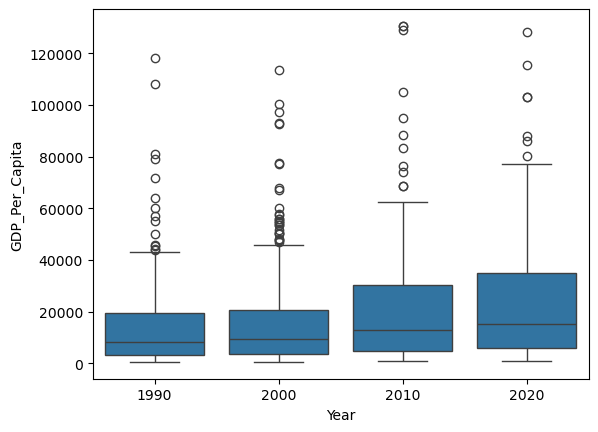

In [38]:
sns.boxplot( x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

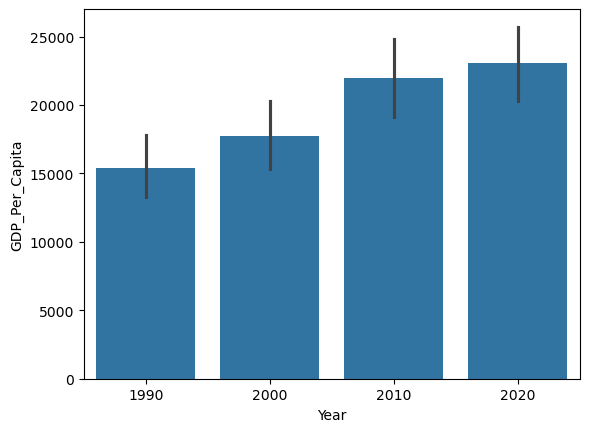

In [40]:
sns.barplot(x="Year", y="GDP_Per_Capita", data=gdp_decades)


<Axes: xlabel='GDP_Per_Capita', ylabel='Year'>

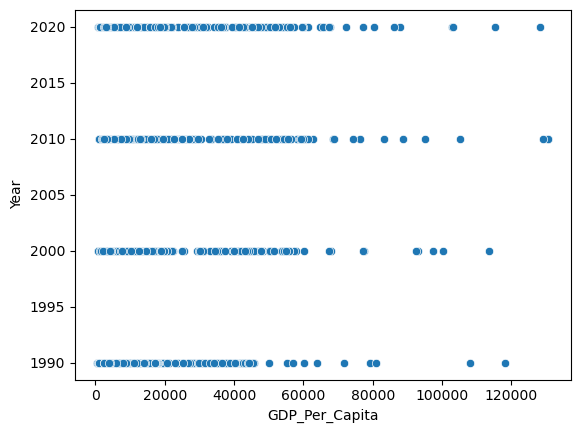

In [42]:
sns.scatterplot(x=gdp_decades["GDP_Per_Capita"], y=gdp_decades["Year"])

<Axes: xlabel='GDP_Per_Capita', ylabel='Year'>

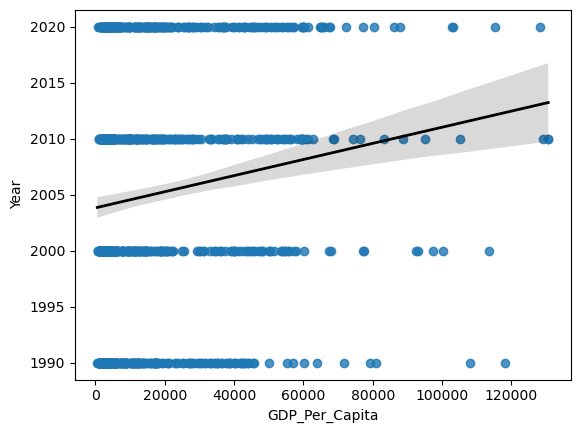

In [48]:

sns.regplot(
    x=gdp_decades["GDP_Per_Capita"],
    y=gdp_decades["Year"],
    line_kws={"color": "black", "linewidth":2})
 

##10: GDP has increased over time. The box chart and scatterplots clearly show the outliers in each year, although the scatterplots make it a little 
##less obvious that we're looking at 4 specific years. The bar chart makes the amount of increase year over year clearest.

In [49]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


In [53]:
gdp_first_100k = gdp_df.loc[gdp_df.GDP_Per_Capita > 100000]

In [55]:
gdp_first_100k.nsmallest(1, 'Year')
## Brunei was the first country to have a GDP over 100k in 1990

,Country,Year,GDP_Per_Capita
974,Brunei,1990,118163.683198
